<a href="https://colab.research.google.com/github/bethweirich/IS-ENES-group_work/blob/main/Copia_di_Unbalanced_2classes%2C_Hypoxia_CLASSIFICATION%2C_hourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **HYPOXIA - VENICE LAGOON - 
  IMBALANCED CLASSIFICATION PROBLEM**
  

*   Severe Imbalance -->  1:120










In [1]:
import pandas as pd
# Use numpy to convert to arrays
import numpy as np
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
# Import train_test_split function

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from datetime import date, datetime

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# ▶ *Upload the dataset*

In [3]:
path_stations = '/content/gdrive/My Drive/Dati/DatiOriginali/Lagoon_WaterQuality/Elaborati/Dataset_hypoxia/Hourly/'

features = pd.read_excel(path_stations + 'hypoxia_dataset_2008-2019_hourly.xlsx')
features

,Unnamed: 0,Unnamed: 0.1,date,x,y,IDSonda,precipitation,humidity,radsol,wind,w_temperature,salinity,DO,chla
0,0,0,2008-01-01 00:00:00,17.56205,50.34165,1,0.0,95.183425,0.000000,1.029575,7.540900,32.591700,100.380000,1.00
1,1,1,2008-01-01 01:00:00,17.56205,50.34165,1,0.0,92.060950,0.000000,1.075490,7.246600,32.566500,94.500000,1.00
2,2,2,2008-01-01 02:00:00,17.56205,50.34165,1,0.0,92.214959,0.000000,1.288724,6.984600,32.592999,94.820002,1.05
3,3,3,2008-01-01 03:00:00,17.56205,50.34165,1,0.0,95.018843,0.000000,1.288724,6.156700,32.415400,99.239999,1.04
4,4,4,2008-01-01 04:00:00,17.56205,50.34165,1,0.0,94.845991,0.000000,1.442809,6.093600,32.406200,99.850002,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638737,740059,51284,2017-07-25 03:00:00,17.54618,50.11736,10,0.0,88.671165,0.000000,0.916847,25.444500,26.997200,39.809999,0.70
638738,740060,51285,2017-07-25 09:00:00,17.54618,50.11736,10,0.0,56.040026,634.850998,1.234913,25.282701,24.244000,51.799999,0.59
638739,740061,51286,2017-07-25 10:00:00,17.54618,50.11736,10,0.0,53.637678,751.019047,1.385282,25.831100,24.966500,59.730000,0.65
638740,740062,51287,2017-07-25 11:00:00,17.54618,50.11736,10,0.0,53.663792,827.589861,1.289285,25.997000,26.298800,61.799999,0.65


In [4]:
# selecting rows based on condition
#features =  features.loc[features['IDSonda'] < 2]  #only station 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f707e837310>,
      dtype=object)

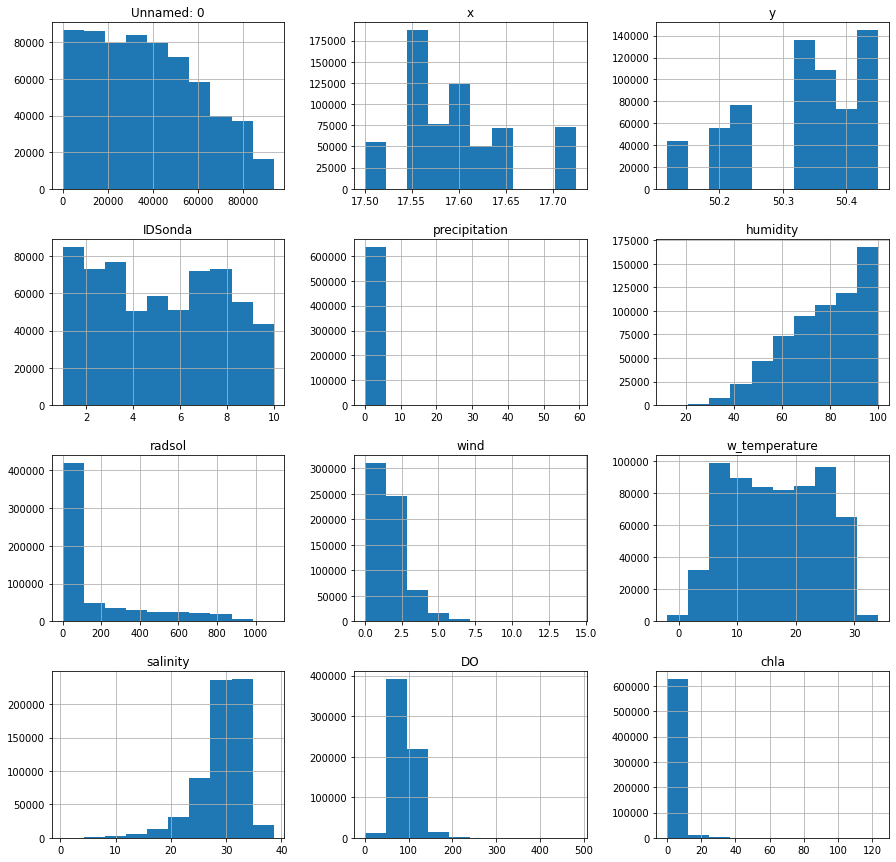

In [ ]:
# histogram of all the variables
features.hist(figsize=(15, 15))

In [ ]:
features.describe()

,Unnamed: 0,x,y,IDSonda,precipitation,humidity,radsol,wind,w_temperature,salinity,DO,chla
count,638742.000000,638742.000000,638742.000000,638742.000000,638742.000000,638742.000000,638742.000000,638742.000000,638742.000000,638742.000000,638742.000000,638742.000000
mean,37494.216930,17.597623,50.338748,5.142428,0.099139,77.623325,160.110315,1.666503,16.645369,29.256460,93.043836,2.402620
std,23706.846901,0.060637,0.096977,2.888879,0.709700,16.588074,249.764984,1.165202,7.744990,4.383993,23.033406,3.671078
min,0.000000,17.500080,50.117360,1.000000,0.000000,12.262226,0.000000,0.000000,-1.997900,0.410000,0.083000,0.010000
25%,17299.000000,17.562050,50.243910,3.000000,0.000000,65.763998,0.000000,0.789737,9.748300,27.493800,81.039999,0.784000
50%,35466.000000,17.601710,50.362470,5.000000,0.000000,79.877731,0.000000,1.478159,16.572505,30.181000,91.596351,1.330000
75%,55140.750000,17.614530,50.406550,8.000000,0.000000,91.817623,248.604809,2.264058,23.504900,32.178200,102.440225,2.544188
max,93648.000000,17.724810,50.450370,10.000000,59.100270,100.000000,1093.621593,14.358378,34.123301,38.623600,482.422700,123.653999


# ▶ Classes of DO

In [5]:
#HYPOXIA < 60 % SAT     #https://www.sincem.unibo.it/images/tesi/Tesi_bianchi.pdf   https://nmsfarallones.blob.core.windows.net/farallones-prod/media/archive/manage/pdf/sac/16_08/SAC_HypoxiaInSanctuaries_JLargier2.pdf
low = features[features.DO <= 60]
high = features[features.DO > 60]

#assigns label to the classes
low["DO"] = 0 
high["DO"] = 1

#feature_class = pd.concat([primo, secondo, terzo, quarto])
feature_class = pd.concat([low, high])
feature_class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,Unnamed: 0.1,date,x,y,IDSonda,precipitation,humidity,radsol,wind,w_temperature,salinity,DO,chla
2678,2688,2688,2008-05-03 06:00:00,17.56205,50.34165,1,0.000000,91.423767,96.921936,1.091830,18.936101,30.52850,0,1.1000
2679,2689,2689,2008-05-03 07:00:00,17.56205,50.34165,1,0.000000,91.676986,237.833783,1.175490,18.959999,30.57910,0,1.1300
2702,2712,2712,2008-05-04 07:00:00,17.56205,50.34165,1,0.000000,68.654206,79.858013,1.980554,19.298900,30.59900,0,1.1000
2792,2802,2802,2008-05-08 07:00:00,17.56205,50.34165,1,0.000000,85.735148,125.314169,0.650979,20.829000,29.06000,0,0.4700
2954,2964,2964,2008-05-15 04:00:00,17.56205,50.34165,1,0.000000,93.373390,0.000000,0.834639,22.987400,31.49560,0,0.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85043,93644,93644,2019-12-12 12:00:00,17.56205,50.34165,1,1.375802,94.149193,21.922295,0.967645,8.207500,30.23945,1,0.9135
85044,93645,93645,2019-12-12 13:00:00,17.56205,50.34165,1,1.706694,99.786218,41.228411,1.710613,8.258100,30.11800,1,0.9465
85045,93646,93646,2019-12-12 14:00:00,17.56205,50.34165,1,0.856190,98.120992,33.729587,0.941293,8.477950,30.30360,1,0.8835
85046,93647,93647,2019-12-12 15:00:00,17.56205,50.34165,1,0.298946,97.395269,26.230763,0.603919,8.925550,30.61990,1,0.9225


# ▶ Data preparation


In [ ]:
features.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'x', 'y', 'IDSonda',
       'precipitation', 'humidity', 'radsol', 'wind', 'w_temperature',
       'salinity', 'DO', 'chla'],
      dtype='object')

In [6]:
# data preparation

dataset = feature_class  #feature_class
print("Dataset shape", dataset.shape)

# predictors
X_t = dataset.drop(labels=['DO', 'date', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1) #'STATION' 'ODmol', ,'Data'
print("X_t shape", X_t.shape)

# target variable
y = dataset['DO']  #ODmol

print("y shape", y.shape)
print("Etichette: ", y)

Dataset shape (85048, 14)
X_t shape (85048, 10)
y shape (85048,)
Etichette:  2678     0
2679     0
2702     0
2792     0
2954     0
        ..
85043    1
85044    1
85045    1
85046    1
85047    1
Name: DO, Length: 85048, dtype: int64


In [7]:
y.value_counts()

1    77466
0     7582
Name: DO, dtype: int64

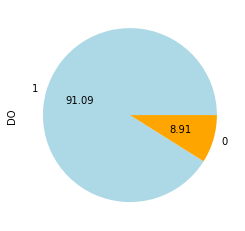

In [8]:
y.value_counts().plot.pie(autopct='%.2f', colors = ['lightblue', 'orange'] )

# ▶ Divide training and testing
*   Keep the test set separated!




In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.3, stratify=y) # 70% training and 30% test

# UNDERSAMPLING TRIALS

### *Random Undersampling*

In [ ]:
'''
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

ax = y_train_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
#y_train_res.value_counts()

### *Tomek Links Undersampling*

In [ ]:
'''
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy=0)
X_train_tl, y_train_tl, id_tl = tl.fit_sample(X_train, y_train)

print('Removed indexes:', id_tl)

plot_2d_space(X_train_tl, y_train_tl, 'Tomek links under-sampling')

# OVERSALMPLING TRIALS

https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook


### *Random Oversampling*

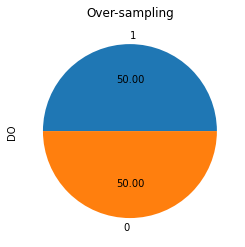

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority")
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

ax = y_train_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [10]:
'''
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from matplotlib import pyplot
from numpy import where

In [11]:
'''
oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)

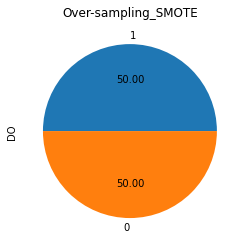

In [12]:
'''
ax = y_train_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling_SMOTE")

# OVER & UNDER SAMPLING with SMOTETomek


In [ ]:
'''
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)



In [ ]:
'''
def plot_2d_space(x_train, y_train, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X_train[y_train==l, 0],
            X_train[y_train==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
#plot_2d_space(X_train_smt, y_train_smt, 'SMOTE + Tomek links')

# ▶ *train resampled and test to numpy*

In [13]:
X_train = X_train_res.to_numpy()
y_train = y_train_res.to_numpy()
#X_train = X_train_smt.to_numpy()
#y_train =y_train_smt.to_numpy()

In [14]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

#**RANDOM** **FOREST**

## RF traditional method - **Train** **Model**  

In [16]:
#SETTING THE SEARCH SPACE

# Number of trees in random forest
n_estimators = [10, 50, 100, 500, 700]

# Maximum number of levels in tree
max_depth = [3, 6, 10, None]

# Minimum number of samples required to split a node
min_samples_split = [3, 5, 7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}   #learning rate

# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, random_grid, n_iter=10, cv = 10, verbose = 4, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 10, None],
                                        'min_samples_split': [3, 5, 7],
                                        'n_estimators': [10, 50, 100, 500,
                                                         700]},
                   verbose=4)

## Performances

In [17]:
#best hyperparameters
print(rf_random.best_params_)

{'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}


In [18]:
best_rf = RandomForestClassifier(n_estimators=50, max_depth=10 , min_samples_split=5, min_samples_leaf=1)   # class_weight='balanced_subsample
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

In [23]:
#create prediction basing on the test set
y_pred = best_rf.predict(X_test)
ytrain_pred = best_rf.predict(X_train)

In [20]:
#create prediction OF THE PROBABILITIES basing on the test set
#y_pred = best_rf.predict_proba(X_test)
#ytrain_pred = best_rf.predict_proba(X_train)

In [21]:
#ytrain_pred

array([[0.02311613, 0.97688387],
       [0.02913773, 0.97086227],
       [0.44361804, 0.55638196],
       ...,
       [0.91775633, 0.08224367],
       [0.89197839, 0.10802161],
       [0.3716207 , 0.6283793 ]])

In [24]:
#print("Accuracy train: ", accuracy_score(y_train, ytrain_pred))
print("Accuracy test: ", accuracy_score(y_test, y_pred))
#print('F1_score train: ',f1_score(y_train, ytrain_pred))
#print('Roc auc train: ',roc_auc_score(y_train, ytrain_pred))

Accuracy test:  0.7829120125416422


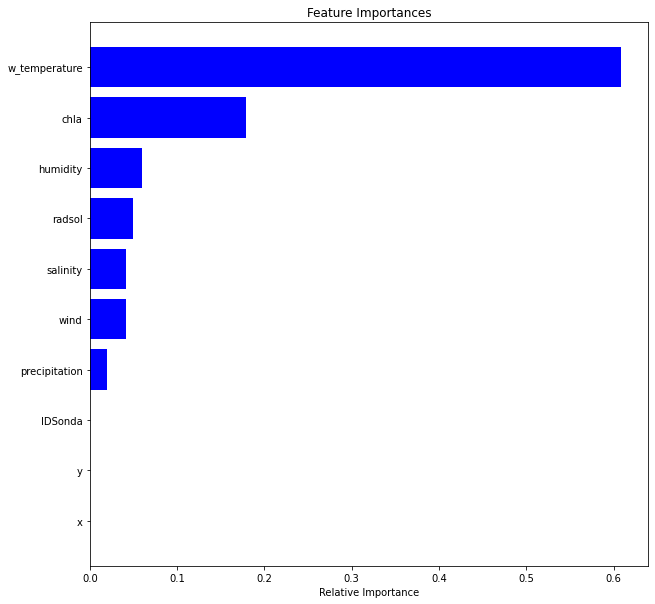

In [25]:
features = X_t.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
#plt.savefig(output_path+'features_importance.png')

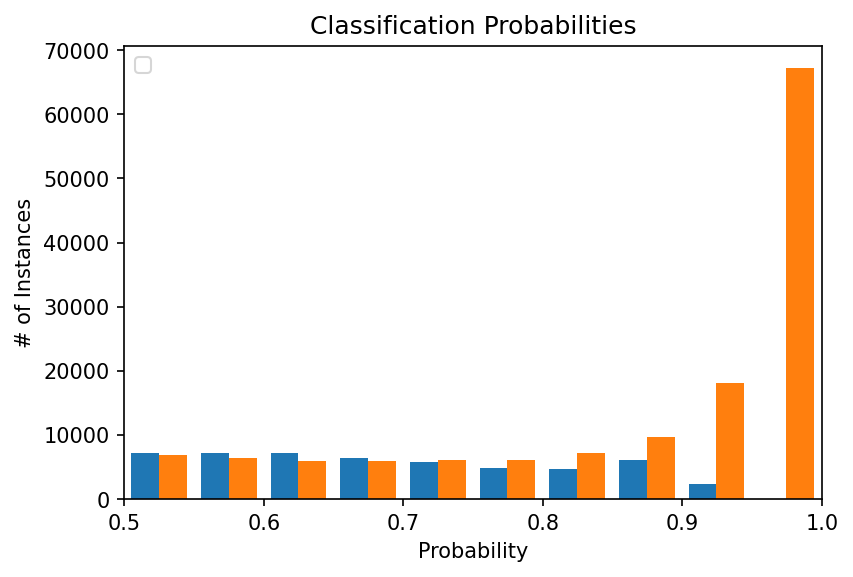

In [ ]:
# get the probability distribution  #probas = rf_clf.predict_proba(X_test)
# plot
plt.figure(dpi=150)
plt.hist(y_pred, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend()
plt.show()

## ROC AUC

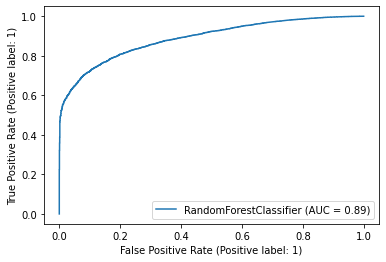

In [26]:
#ROC CURVE
from sklearn.metrics import RocCurveDisplay
best_rf_disp = RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.show()

In [27]:
'''
#PRECISION AND RECALL CURVE
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
# average precision score
avg_precision = average_precision_score(y_test, probas[:,1])
# precision auc
pr_auc = auc(recall, precision)
# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

NameError: ignored

In [28]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
#print("roc_auc:",metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.7829120125416422
              precision    recall  f1-score   support

           0       0.27      0.84      0.41      2275
           1       0.98      0.78      0.87     23240

    accuracy                           0.78     25515
   macro avg       0.62      0.81      0.64     25515
weighted avg       0.92      0.78      0.83     25515



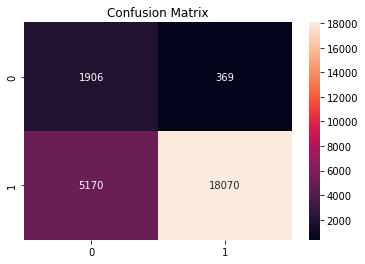

In [30]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.title("Confusion Matrix")
sns.heatmap(conf_mat,annot=True,fmt='.0f')
plt.show()
#plt.savefig(output_path+'confusion_matrix.png')

In [ ]:
#unique, counts = np.unique(y_pred, return_counts=True)
#dict(zip(unique, counts))

### *RF without best paramether method*

In [ ]:
'''
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
'''
parameters = {'n_estimators': [750],'criterion':['gini', 'entropy']}

In [ ]:
'''
model = GridSearchCV(
      RandomForestClassifier(),
      param_grid=parameters,
      n_jobs=10, cv=10)
model.fit(X_train,y_train)
rm_pred=model.predict(X_test)
print("Accuracy Test:",metrics.accuracy_score(y_test, rm_pred))

Accuracy Test: 0.9973049281314168


In [ ]:
'''
!pip install scikit-plot
import scikitplot.metrics as splt
splt.plot_confusion_matrix(y_test, rm_pred)

In [ ]:
'''
print(metrics.classification_report(y_test, rm_pred))

              precision    recall  f1-score   support

           1       1.00      0.16      0.28        25
           2       1.00      1.00      1.00      7767

    accuracy                           1.00      7792
   macro avg       1.00      0.58      0.64      7792
weighted avg       1.00      1.00      1.00      7792



# ⬛ Save and load the model

In [ ]:
#salva il modello
joblib.dump(best_rf, path_stations + "RF_hypoxia_undersample.joblib")
#joblib.dump(best_rf, path + "random_forest_full_pt_norm.joblib")

['/content/gdrive/My Drive/Dati/DatiOriginali/Lagoon_WaterQuality/Elaborati/Dataset_hypoxia/Hourly/RF_hypoxia_undersample.joblib']

In [ ]:
best_rf = joblib.load(path_stations + "RF_hypoxia_undersample.joblib")

--------------------------------------------------------------------------------
# ⛔ FOR THODORIS, STOP HERE :)

# Random Forest for unbalanced datasets

### Random Forest for Imbalanced Classification

In [ ]:
# class balanced random forest for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# define model
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.992


### *Class_weight argument to the value ‘balanced_subsample*

In [ ]:
model = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.764


### *BalancedRandomForestClassifier class* 

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
# define model
model = BalancedRandomForestClassifier(n_estimators=10)

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.879


# COMPARE CLASSIFIERS

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

Defining learning classifiers

In [ ]:
names = ["Linear_SVM", "Polynomial_SVM", "RBF_SVM",  "Neural_Net", "AdaBoost",
         "Naive_Bayes"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB()]

In [ ]:
model_ada = AdaBoostClassifier(n_estimators=100)

Build Model, Apply Model on Test Data & Record Accuracy Scores

In [ ]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [ ]:
scores

[0.9883213552361396,
 0.9883213552361396,
 0.9883213552361396,
 0.9883213552361396,
 0.9879363449691991,
 0.8803901437371663]

In [ ]:
model_ada.fit(X_train, y_train)
score_model_ada = model_ada.score(X_test, y_test) 

In [ ]:
score_model_ada

0.9879363449691991

Analysis of Model Performance

In [ ]:
import seaborn as sns

Create data frame of model performance

In [ ]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Linear_SVM,0.988321
1,Polynomial_SVM,0.988321
2,RBF_SVM,0.988321
3,Neural_Net,0.988321
4,AdaBoost,0.987936
5,Naive_Bayes,0.880390


Adding colors to the data frame

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Linear_SVM,0.988321
1,Polynomial_SVM,0.988321
2,RBF_SVM,0.988321
3,Neural_Net,0.988321
4,AdaBoost,0.987936
5,Naive_Bayes,0.880390


Bar plot of model performance

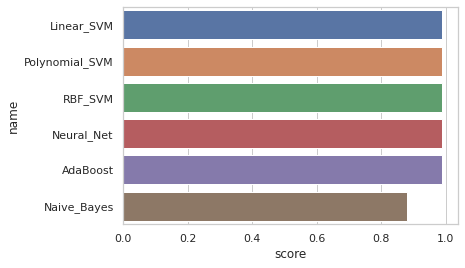

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [ ]:
#create prediction basing on the test set
y_pred = model_ada.predict(X_test)
ytrain_pred = model_ada.predict(X_train)

vorrei capire se da qui posso ricavarmi le accuraci di ogni modello

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.20      0.01      0.02        91
           2       0.99      1.00      0.99      7701

    accuracy                           0.99      7792
   macro avg       0.59      0.51      0.51      7792
weighted avg       0.98      0.99      0.98      7792



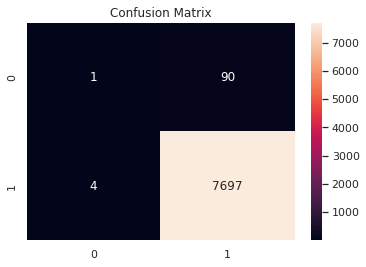

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.title("Confusion Matrix")
sns.heatmap(conf_mat,annot=True,fmt='.0f')
plt.show()

# LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(class_weight="balanced").fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [ ]:
print('In-sample accuracy: %0.3f' %
      accuracy_score(y_train, logistic.predict(X_train)))
print('Out-of-sample accuracy: %0.3f' %
      accuracy_score(y_test, y_pred))

In-sample accuracy: 0.712
Out-of-sample accuracy: 0.710


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.83      0.22      9418
           1       0.99      0.70      0.82    182205

    accuracy                           0.71    191623
   macro avg       0.56      0.77      0.52    191623
weighted avg       0.95      0.71      0.79    191623



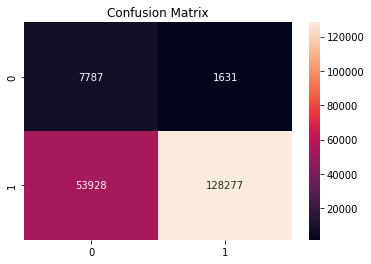

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.title("Confusion Matrix")
sns.heatmap(conf_mat,annot=True,fmt='.0f')
plt.show()

In [ ]:
# Evaluate a score by cross-validation.
scores = cross_val_score(logistic, X_train, y_train, scoring='roc_auc', cv=None, n_jobs=-1)

In [ ]:
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.842


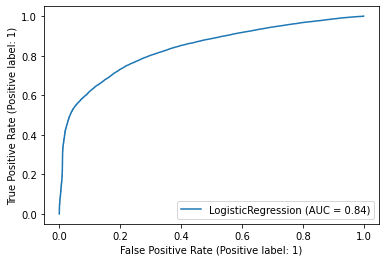

In [ ]:
#ROC CURVE
from sklearn.metrics import RocCurveDisplay
best_rf_disp = RocCurveDisplay.from_estimator(logistic, X_test, y_test)
plt.show()

## Probability of each sample to belong to a class

In [ ]:
for var, coef in zip(dataset.w_temperature,
                     logistic.coef_[0]):
  print("%7s : %7.3f" %(var, coef))

18.9361005783081 :   0.021
18.9599990844727 :   0.072
19.2988998413086 :   0.010
20.8289999008179 :   0.010
22.9874 :  -0.018
22.7599 :   0.000
22.6284 :   0.064
22.6179 :  -0.240
22.6129 :   0.080
22.8765 :  -0.000


In [ ]:
print('\nclasses:', logistic.classes_)
print('\nProbs:\n', logistic.predict_proba(X_test)[:365,:])


classes: [0 1]

Probs:
 [[0.4135112  0.5864888 ]
 [0.27948137 0.72051863]
 [0.51688145 0.48311855]
 [0.0362484  0.9637516 ]
 [0.58320854 0.41679146]
 [0.30024669 0.69975331]
 [0.02479241 0.97520759]
 [0.22634438 0.77365562]
 [0.07051642 0.92948358]
 [0.78834059 0.21165941]
 [0.09907678 0.90092322]
 [0.45986062 0.54013938]
 [0.08292662 0.91707338]
 [0.05305949 0.94694051]
 [0.83742423 0.16257577]
 [0.62773425 0.37226575]
 [0.19872659 0.80127341]
 [0.00317303 0.99682697]
 [0.06518817 0.93481183]
 [0.73362338 0.26637662]
 [0.52907152 0.47092848]
 [0.67768082 0.32231918]
 [0.59998445 0.40001555]
 [0.03475235 0.96524765]
 [0.35402924 0.64597076]
 [0.84776646 0.15223354]
 [0.24561857 0.75438143]
 [0.62135331 0.37864669]
 [0.32542888 0.67457112]
 [0.36860162 0.63139838]
 [0.40137691 0.59862309]
 [0.26425081 0.73574919]
 [0.43354116 0.56645884]
 [0.73692746 0.26307254]
 [0.74895475 0.25104525]
 [0.70320151 0.29679849]
 [0.07620577 0.92379423]
 [0.0314166  0.9685834 ]
 [0.0920795  0.9079205 ]


# WEIGHTED SVM 

In [ ]:
# fit a svm on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

In [ ]:
# define model
#weights = {0:100.0, 1:1.0}
SVM_model = SVC(gamma='scale', class_weight='balanced')  # , class_weight='balanced'

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# evaluate model
scores = cross_val_score(SVM_model, X_t, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
SVM_model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [ ]:
y_pred = SVM_model.predict(X_test)

In [ ]:
print('In-sample accuracy: %0.3f' %
      accuracy_score(y_train, SVM_model.predict(X_train)))
print('Out-of-sample accuracy: %0.3f' %
      accuracy_score(y_test, y_pred))

In-sample accuracy: 0.616
Out-of-sample accuracy: 0.600


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.05      1.00      0.09        20
           1       1.00      0.59      0.74      1033

    accuracy                           0.60      1053
   macro avg       0.52      0.80      0.42      1053
weighted avg       0.98      0.60      0.73      1053



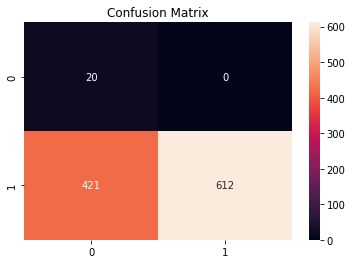

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.title("Confusion Matrix")
sns.heatmap(conf_mat,annot=True,fmt='.0f')
plt.show()

### Bagging Classifier for imbalanced classification

In [ ]:
# bagged decision trees on an imbalanced classification problem
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [ ]:
...
# define model
model = BaggingClassifier()

In [ ]:
...
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.999


# BalancedBaggingClassifier class.

In [ ]:
# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedBaggingClassifier

In [ ]:
# define model
model = BalancedBaggingClassifier()

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# evaluate model
scores = cross_val_score(model, X_t, y, scoring='roc_auc', cv=cv, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/ensemble/_bagging.py", line 321, in fit
    return self._fit(X, y, self.max_samples, sample_weight=None)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 337, in _fit
    max_features = self.max_features * self.n_features_in_
At

In [ ]:
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: nan


## EasyEnsembleClassifier

In [ ]:
# easy ensemble for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
# define model
model = EasyEnsembleClassifier(n_estimators=10)

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# evaluate model
scores = cross_val_score(model, X_t, y, scoring='roc_auc', cv=cv, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/ensemble/_easy_ensemble.py", line 224, in fit
    return self._fit(X, y, self.max_samples, sample_weight=None)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 337, in _fit
    max_features = self.max_features * self.n_features_

In [ ]:
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: nan


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
26767    1
26768    1
26769    1
26770    1
26771    1
Name: hypoxia_label, Length: 26772, dtype: int64

# FIT THE MODEL AND SEE THE PERFORMANCES

In [ ]:
# Fit the random search model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10)

In [ ]:
#create prediction basing on the test set
y_pred = model.predict(X_test)
ytrain_pred = model.predict(X_train)

In [ ]:
print("Accuracy test: ", accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy test:  0.9213559958877587
              precision    recall  f1-score   support

           0       0.34      0.62      0.44      9418
           1       0.98      0.94      0.96    182205

    accuracy                           0.92    191623
   macro avg       0.66      0.78      0.70    191623
weighted avg       0.95      0.92      0.93    191623



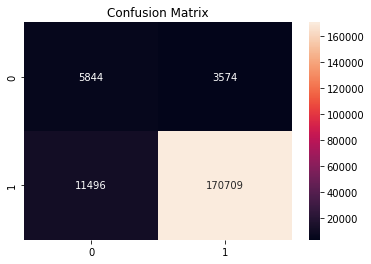

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.title("Confusion Matrix")
sns.heatmap(conf_mat,annot=True,fmt='.0f')
plt.show()

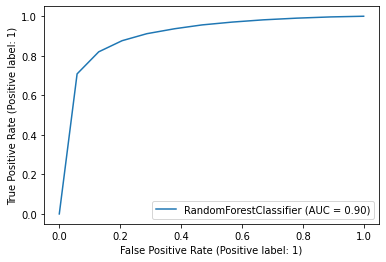

In [ ]:
#ROC CURVE
from sklearn.metrics import RocCurveDisplay
best_rf_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()